In [1]:
import pandas as pd

df = pd.read_csv('./tes_companies.csv')
print(df.shape)
df.dropna(subset=['출원인'], inplace=True)
df['출원인'] = df['출원인'].str.lower()

(11395, 69)


In [11]:
new_df = df.loc[df['출원인'].apply(lambda x : '|' in x)].copy()
new_df['companies_lst'] = new_df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))
companies_unique_lst = new_df.explode('companies_lst')['companies_lst'].value_counts().index
new_df=new_df.explode('companies_lst')


In [125]:
# 회사명 통일성 확보
df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))

# Create separate rows for each combination
df_expanded = df.explode('companies')

In [106]:
def remove_stopwords(word):
    stopwords = ['corporation', 'corp', 'company', 'central', 'r&d', 'labs', 'industries', 'inc', 
                 'llc', 'limited', 'ltd', '.', ',', '  ']
    for stopword in stopwords:
        word = word.replace(stopword, '')
    word.rstrip()
    return word


def is_university(word):
    university_keywords = ['university', 'universite', 'univ', 'université', 'universitat','universität',
                           'institute', 'college', 'school', 'academy', 'faculty', 'institut',
                           'polytechnic', 'technische']
    lower_name = word.lower().split()
    if any(keyword in university_keywords for keyword in lower_name):
        return "university"
    else:
        return word

def is_country_or_district(name):
    # Add your list of country and district names here
    countries_districts = ['china', 'us', 'uk', 'france', 'germany', 'japan', 'korea', 'italy', 'canada', 'australia', 
                           'russia', 'india', 'brazil', 'south africa', 'mexico', 'spain', 'jiangsu', 'california', 
                           'texas', 'florida', 'new york', 'ontario', 'quebec', 'beijing', 'shanghai', 'moscow', 
                           'london', 'paris', 'berlin', 'sydney']
    return name.lower() in countries_districts





In [107]:
df_expanded['companies'] = df_expanded['companies'].apply(lambda x: remove_stopwords(x))
df_expanded['companies'] = df_expanded['companies'].apply(lambda x: is_university(x))

In [114]:
len(df_expanded['companies'].unique())

2810

In [134]:
# First, read the reassigned company dictionary to get the categories
reassigned_company_dict = {}
with open('reassigned_company_dictionary.txt', 'r', encoding='utf-8') as file:
    current_category = None
    for line in file:
        cleaned_line = line.strip()
        if cleaned_line.endswith(':'):
            current_category = cleaned_line[:-1]
            reassigned_company_dict[current_category] = []
        elif cleaned_line.startswith('- '):
            reassigned_company_dict[current_category].append(cleaned_line[2:])
print(reassigned_company_dict)

def company_assign(word):
    word = remove_stopwords(word)
    university_keywords = ['university', 'universite', 'univ', 'université', 'universitat','universität',
                           'institute', 'college', 'school', 'academy', 'faculty', 'institut',
                           'polytechnic', 'technische']
    lower_name = word.lower().split()
    if any(keyword in university_keywords for keyword in lower_name):
        return "university"
    word = word.rstrip()
    for category, companies in reassigned_company_dict.items():
        if word in companies:
            #if category == "panasonic":
            #    print(word)
            return category
    return word

df_expanded['companies'] = df_expanded['companies'].apply(lambda x: company_assign(x))

column_data = df_expanded['companies'].unique()
import numpy as np
np.savetxt('column_data.txt', column_data, fmt='%s', encoding='utf-8')

{'university': ['university'], 'People': ['lee yong joon', 'lee min suk', 'lee jong eun', 'lee geon-hwa', 'choi young-hwan', 'choi sung-hwan', 'choi jin-min', 'choi young-il', 'zhang li', 'zhang liqiang', 'zhang xiaoqing', 'zhang rui', 'yang tai-her', 'yang tai he', 'lim yong-hoon', 'lim ji hoon', 'kim no eul', 'kim mi sun', 'kim hyung-gon', 'kim young nam', 'kim seong-hoon', 'kim byunggyun', 'kim kwang soo', 'kim eun yeon', 'kim dongho', 'smith alexander d', 'smith david', 'smith kevin', 'liu hongzhang', 'liu yang', 'jin jung-hong', 'jin ju-hwan', 'cooper timothy patrick', 'kagerer hans jürgen', 'kagerer hans-jürgen', 'scott dr ian richard', 'scott ian richard', 'yamaguchi michiko', 'yamaguchi yoshinobu', 'yamaguchi kenichi', 'johnson richard lee', 'kevin hans melsheimer', 'kevin lee friesth', 'wang; yonghua', 'wang; ling', 'wang; sen', 'chan wing hong', 'chan kin sang tony', 'chan tiankai'], 'rolls-royce': ['rolls-royce north american technologies', 'rolls-royce plc', 'rolls-royce', 

In [135]:
for i in df_expanded['companies'].value_counts().index:
    print(i)

university
toyota
siemens
denso
panasonic
mitsubishi
valeo
kabushiki
cea
general electric
daikin
People
toshiba
sumitomo
johnson controls
hitachi
sharp
hutchinson
malta
yazaki
rolls-royce
keihin
nederlandse
basf
lg
furukawa
ngk
ifp
carrier
abb
german aerospace center
abengoa
toho
kaneka
phase
intel
robert bosch gmbh
sunamp
nippon
calsonic kansei
kyungdong navien
mahle
linde
hamilton
alstom
ford global technologies
samsung
dow
fraunhofer-gesellschaft
centre
boeing
alliance for sustainable energy
rondo energy
ricoh
ihi
japan climate systems
whirlpool
microsoft
bsh
glasspoint solar
kyocera
tokitae
ibiden co
murata
clean
kobe steel
lumenion
hydrostor
viessmann
magaldi
shell
fujifilm
rheem
kelvin
showa
midea
kawasaki
highview enterprises
raytheon
aisin
saint-gobain
gm
tokyo
emerson
eidai co
thermo
vito
canon
isentropic
jfe
fuji
electrolux
shenzhen enesoon science & technology co
lightsail energy
bae systems plc
oumi kogyo kk
octopus energy group
sanden
energynest as
national
nuovo
internati

In [136]:
print(df_expanded['companies'].value_counts()[:50])


university                  912
toyota                      349
siemens                     339
denso                       247
panasonic                   220
mitsubishi                  219
valeo                       150
kabushiki                   148
cea                         122
general electric            118
daikin                      105
People                       88
toshiba                      85
sumitomo                     81
johnson controls             76
hitachi                      74
sharp                        72
hutchinson                   69
malta                        68
yazaki                       65
rolls-royce                  62
keihin                       54
nederlandse                  54
basf                         53
lg                           53
furukawa                     49
ngk                          46
ifp                          45
carrier                      44
abb                          43
german aerospace center      42
abengoa 

In [137]:
len(df_expanded['companies'].unique())

2436

In [138]:
column_data = df_expanded['companies'].unique()
np.savetxt('column_data.txt', column_data, fmt='%s', encoding='utf-8')



In [139]:
new_df = new_df.dropna(subset=['국제특허분류'])

In [141]:
df_expanded['ipc_code'] = new_df['국제특허분류'].apply(lambda x: x.split(','))
df_explode =df_expanded.explode(['ipc_code'])
df_explode['ipc_code']

C:\Users\antho\AppData\Local\Temp\ipykernel_50960\483150737.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_expanded['ipc_code'] = new_df['국제특허분류'].apply(lambda x: x.split(','))


ValueError: cannot reindex on an axis with duplicate labels

In [35]:
# 내게 주어 진 것. 
# 잘 전처리된 회사들과 각각의 tes 특허 ipc 데이터
# 특허 비중 바탕 clustering

In [66]:
df_explode['ipc_code_front'] = df_explode['ipc_code'].apply(lambda x : x.split('-')[0])

vector_table = df_explode.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc='size', fill_value=0)
vector_table = vector_table.div(vector_table.sum(axis=1), axis=0)

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(vector_table)

# 결과 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=vector_table.index, columns=vector_table.index)

# 결과 출력

similarity_df


NameError: name 'df_explode' is not defined

In [67]:
top20_company = df_explode['companies_lst'].value_counts()[:20].index

NameError: name 'df_explode' is not defined

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.loc[top20_company,top20_company], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1)
plt.title('Cosine Similarity Between Companies')
plt.show()


NameError: name 'similarity_df' is not defined

<Figure size 1000x800 with 0 Axes>

In [55]:
top20_similarity_df =similarity_df.loc[top20_company,top20_company]

# 특허 분류 바탕으로 네트워크 그리기


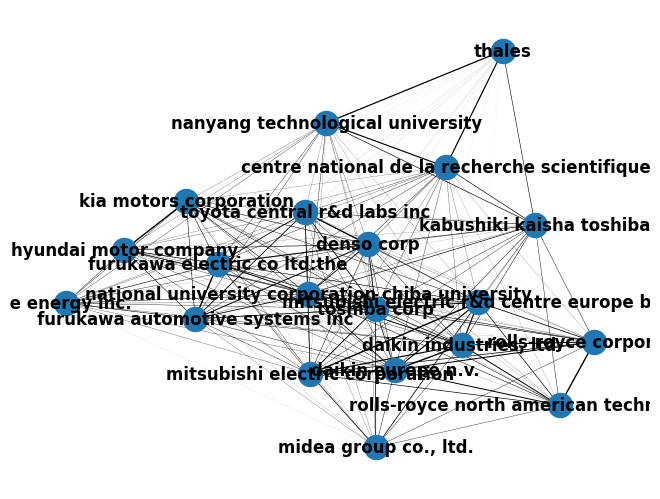

In [57]:


import matplotlib.pyplot as plt
import networkx as nx

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가
G.add_nodes_from(top20_similarity_df.index)

# 엣지 및 두께 설정
for i in range(len(top20_similarity_df.index)):
    for j in range(i + 1, len(top20_similarity_df.index)):
        similarity = top20_similarity_df.iloc[i, j]
        if similarity > 0:  # 유사도가 0 이상인 경우에만 엣지 추가
            G.add_edge(top20_similarity_df.index[i], top20_similarity_df.index[j], weight=similarity)

# 두께 계산
widths = [data['weight'] for _, _, data in G.edges(data=True)]

# 네트워크 그리기
pos = nx.spring_layout(G)  # 레이아웃 설정
nx.draw(G, pos, with_labels=True, font_weight='bold', width=widths)

# 그래프 출력
plt.show()


In [61]:
vector_table.loc[top20_company]

ipc_code_front,A01N,A41D,A42B,A47F,A61B,B01D,B01J,B04C,B22F,B23K,...,H01L,H01M,H02J,H02K,H02M,H02N,H02S,H05B,H05K,H10N
companies_lst,,,,,,,,,,,,,,,,,,,,,
toyota central r&d labs inc,0.0,0.0,0.0,0.0,0.0,0.034483,0.006897,0.006897,0.0,0.006897,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
centre national de la recherche scientifique,0.0,0.0,0.0,0.0,0.0,0.000000,0.077586,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
denso corp,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.009524,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
rolls-royce corporation,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
nanyang technological university,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
"rolls-royce north american technologies, inc.",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
furukawa electric co ltd:the,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
furukawa automotive systems inc,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
daikin europe n.v.,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


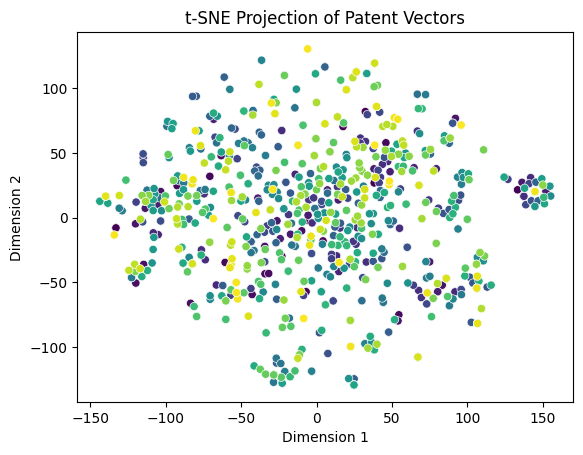

In [64]:
import seaborn as sns
from sklearn.manifold import TSNE

# t-SNE를 사용하여 벡터 값을 2차원에 투영
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vector_table)

# 투영된 벡터 값을 데이터프레임으로 변환
df_2d = pd.DataFrame(vectors_2d, index=vector_table.index, columns=['Dimension 1', 'Dimension 2'])

# 클러스터링을 위해 Seaborn을 사용하여 플로팅
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d, hue=df_2d.index, palette='viridis', legend=False)
plt.title('t-SNE Projection of Patent Vectors')
plt.show()

c:\Users\Ksunwoo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


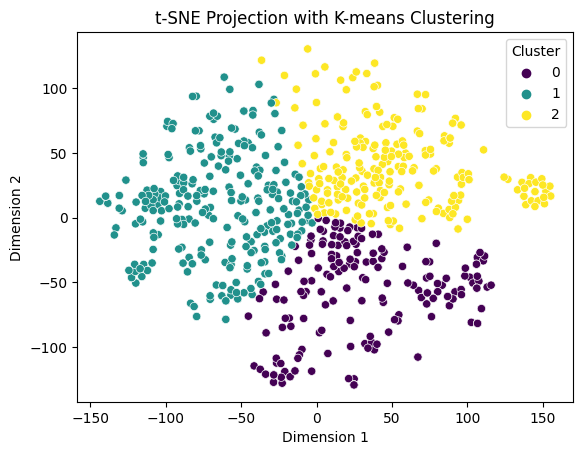

In [65]:
from sklearn.cluster import KMeans

# K-means 클러스터링을 적용
num_clusters = 3  # 클러스터의 개수를 조정할 수 있습니다.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_2d['Cluster'] = kmeans.fit_predict(vectors_2d)

# 클러스터링 결과 시각화
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d, hue='Cluster', palette='viridis', legend='full')
plt.title('t-SNE Projection with K-means Clustering')
plt.show()


In [68]:
df_2d[df_2d['Dimension 1']>130]

,Dimension 1,Dimension 2,Cluster
companies_lst,,,
aalborg csp a/s,133.286758,21.502811,2
"aldemir, alper",137.501846,16.493290,2
"bernroiter, siegfried",137.501846,16.493290,2
"binici, baris",136.239899,27.302792,2
caldic nederland b.v. (cal),152.108002,20.413052,2
chongqing university,137.501846,16.493290,2
clipsol,141.988922,30.927544,2
commissariat à l'energie atomique et aux energies alternatives,137.501846,16.493290,2
"enea, agencia nazionale per le nuove tecnologie, l' energia e lo sviluppo economico sostenibile",140.889450,26.250593,2


### 공개일 기반 가중치 부여 하여 simmilarity 수정 뽑고 비교 분석하면 될듯. 내일에게 맡긴다.

In [84]:
import datetime
def make_datetime(string):
    return datetime.datetime.strptime(string, '%Y.%m.%d')

In [87]:
df_explode_dropdate= df_explode.dropna(subset=['공개일'])

In [92]:
df_explode_dropdate['year'] = df_explode_dropdate['공개일'].apply(lambda x : make_datetime(x).year)

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\2311123470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['year'] = df_explode_dropdate['공개일'].apply(lambda x : make_datetime(x).year)


In [111]:
df_explode_dropdate['year_coef'] = df_explode_dropdate['year'].apply(lambda x : weight_function(x))
df_explode_dropdate['year_coef']

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\2987641942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['year_coef'] = df_explode_dropdate['year'].apply(lambda x : weight_function(x))


14       1.00000
14       1.00000
14       1.00000
14       1.00000
14       1.00000
          ...   
11161    0.28243
11161    0.28243
11161    0.28243
11192    0.28243
11192    0.28243
Name: year_coef, Length: 6135, dtype: float64

In [123]:
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])

vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc='size', fill_value=0)
sum(vector_table.loc['chongqing university'])

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\3076551403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])


1

In [126]:
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])

weighted_vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front',values='year_coef', aggfunc='sum', fill_value=0)
weighted_vector_table = weighted_vector_table.div(weighted_vector_table.sum(axis=1), axis=0)

# 코사인 유사도 계산
weighted_similarity_matrix = cosine_similarity(weighted_vector_table)

# 결과 데이터프레임 생성
weighted_similarity_df = pd.DataFrame(weighted_similarity_matrix, index=weighted_vector_table.index, columns=weighted_vector_table.index)

# 결과 출력

weighted_similarity_df


C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\1078942396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])


companies_lst,oy,"aac acoustic technologies (shenzhen) co., ltd.","aac technologies (nanjing) co., ltd.",aalborg csp a/s,abengoa solar llc,academia sinica,act interior kk,"agency for science, technology and research","agenzia nazionale per le nuove tecnologie, l'energia e lo sviluppo economico sostenibile (enea)","ahola, jero",...,yokohama rubber co ltd:the,"york (wuxi) air conditioning and refrigeration co., ltd.",ze energy inc.,zehnder group international ag,zeon corporation,zhejiang university,"zhen ding technology co., ltd.","ziegler, klausdieter","ziegler, maximilian",zilinská univerzita v ziline
companies_lst,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.219981,0.131607,0.235702,...,0.0,0.534522,0.423078,0.0,0.0,0.0,0.0,0.833333,0.833333,0.534311
"aac acoustic technologies (shenzhen) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.078134,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
"aac technologies (nanjing) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.078134,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
aalborg csp a/s,0.333333,0.0,0.0,1.000000,0.000000,0.0,0.0,0.438947,0.000000,0.235702,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.843649
abengoa solar llc,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.219186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhejiang university,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
"zhen ding technology co., ltd.",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
"ziegler, klausdieter",0.833333,0.0,0.0,0.500000,0.000000,0.0,0.0,0.274722,0.098706,0.235702,...,0.0,0.400892,0.317309,0.0,0.0,0.0,0.0,1.000000,1.000000,0.611646


In [107]:
df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc = 'sum',fill_value=0)

F-Term                          \
ipc_code_front                                   A01N  A41D  A42B  A47F  A61B   
companies_lst                                                                   
 oy                                                 0     0     0     0     0   
aac acoustic technologies (shenzhen) co., ltd.      0     0     0     0     0   
aac technologies (nanjing) co., ltd.                0     0     0     0     0   
aalborg csp a/s                                     0     0     0     0     0   
abengoa solar llc                                   0     0     0     0     0   
...                                               ...   ...   ...   ...   ...   
zhejiang university                                 0     0     0     0     0   
zhen ding technology co., ltd.                      0     0     0     0     0   
ziegler, klausdieter                                0     0     0     0     0   
ziegler, maximilian                                 0     0     0     0     0   
zilinská univerzita v ziline                        0     0     0     0     0   

                                                                              \
ipc_code_front                                  B01D  B01J  B04C  B22F  B23K   
companies_lst                                                                  
 oy                                                0     0     0     0     0   
aac acoustic technologies (shenzhen) co., ltd.     0     0     0     0     0   
aac technologies (nanjing) co., ltd.               0     0     0     0     0   
aalborg csp a/s                                    0     0     0     0     0   
abengoa solar llc                                  0     0     0     0     0   
...                                              ...   ...   ...   ...   ...   
zhejiang university                                0     0     0     0     0   
zhen ding technology co., ltd.                     0     0     0     0     0   
ziegler, klausdieter                               0     0     0     0     0   
ziegler, maximilian                                0     0     0     0     0   
zilinská univerzita v ziline                       0     0     0     0     0   

                                                ... 현재소유자                      \
ipc_code_front                                  ...  H01L H01M H02J H02K H02M   
companies_lst                                   ...                             
 oy                                             ...     0    0    0    0    0   
aac acoustic technologies (shenzhen) co., ltd.  ...     0    0    0    0    0   
aac technologies (nanjing) co., ltd.            ...     0    0    0    0    0   
aalborg csp a/s                                 ...     0    0    0    0    0   
abengoa solar llc                               ...     0    0    0    0    0   
...                                             ...   ...  ...  ...  ...  ...   
zhejiang university                             ...     0    0    0    0    0   
zhen ding technology co., ltd.                  ...     0    0    0    0    0   
ziegler, klausdieter                            ...     0    0    0    0    0   
ziegler, maximilian                             ...     0    0    0    0    0   
zilinská univerzita v ziline                    ...     0    0    0    0    0   

                                                                         
ipc_code_front                                 H02N H02S H05B H05K H10N  
companies_lst                                                            
 oy                                               0    0    0    0    0  
aac acoustic technologies (shenzhen) co., ltd.    0    0    0    0    0  
aac technologies (nanjing) co., ltd.              0    0    0    0    0  
aalborg csp a/s                                   0    0    0    0    0  
abengoa solar llc                                 0    0    0    0    0  
...                                             ...  ...  ...  .

In [104]:
import numpy as np
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x: x.split('-')[0])

def weight_function(year, current_year =2023):
    weight = 0.9 ** (current_year - year)
    return weight

# 'year' 열을 기반으로 가중치를 부여하여 벡터 생성
weighted_vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc=lambda x: np.sum(x * weight_function(x)), fill_value=0)

# 벡터 정규화
weighted_vector_table = weighted_vector_table.div(weighted_vector_table.sum(axis=1), axis=0)

# 코사인 유사도 계산
weighted_similarity_matrix = cosine_similarity(weighted_vector_table)

# 결과 데이터프레임 생성
weighted_similarity_df = pd.DataFrame(weighted_similarity_matrix, index=weighted_vector_table.index, columns=weighted_vector_table.index)

# 결과 출력
weighted_similarity_df


C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\1085135177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x: x.split('-')[0])


TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [103]:
similarity_df

companies_lst,oy,"aac acoustic technologies (shenzhen) co., ltd.","aac technologies (nanjing) co., ltd.",aalborg csp a/s,abengoa solar llc,academia sinica,act interior kk,"agency for science, technology and research","agenzia nazionale per le nuove tecnologie, l'energia e lo sviluppo economico sostenibile (enea)","ahola, jero",...,yokohama rubber co ltd:the,"york (wuxi) air conditioning and refrigeration co., ltd.",ze energy inc.,zehnder group international ag,zeon corporation,zhejiang university,"zhen ding technology co., ltd.","ziegler, klausdieter","ziegler, maximilian",zilinská univerzita v ziline
companies_lst,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.278019,0.125988,0.235702,...,0.0,0.534522,0.419927,0.0,0.0,0.0,0.0,0.833333,0.833333,0.544331
"aac acoustic technologies (shenzhen) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
"aac technologies (nanjing) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
aalborg csp a/s,0.333333,0.0,0.0,1.000000,0.000000,0.0,0.0,0.417029,0.000000,0.235702,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.816497
abengoa solar llc,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.235702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhejiang university,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
"zhen ding technology co., ltd.",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
"ziegler, klausdieter",0.833333,0.0,0.0,0.500000,0.000000,0.0,0.0,0.312772,0.094491,0.235702,...,0.0,0.400892,0.314945,0.0,0.0,0.0,0.0,1.000000,1.000000,0.612372
